In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
path = "D:/Study/MSIT/2nd Year/DataScience_2019501007/Intro to Machine Learning/Graduate Admission Prediction - Linear Regression/"

In [3]:
train = path + "Admission_Predict.csv"
df = pd.read_csv(train)
print(df.shape)
df.columns

(400, 9)


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
X = df.drop(['Serial No.', 'Chance of Admit '], axis = 1)
Y = df['Chance of Admit ']
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [5]:
df.isnull().sum()
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [7]:
intercept = model.intercept_
coefficient = model.coef_
# print(coefficient)
print('Admit = {0:0.2f} + ({1:0.3f} * X_train)'.format(intercept, coefficient[0]))

Admit = -1.29 + (0.002 * X_train)


In [8]:
predictions = model.predict(X_test)
predictions.shape

(100,)

In [9]:
metrics_df = pd.DataFrame({'Metric' : ["Mean Absolute error", "Mean Squared error", "Root Mean Squared Error"], 
                           'Value' : [metrics.mean_absolute_error(Y_test, predictions), 
                                     metrics.mean_squared_error(Y_test, predictions),
                                     np.sqrt(metrics.mean_squared_error(Y_test, predictions))]})
metrics_df

,Metric,Value
0,Mean Absolute error,0.047078
1,Mean Squared error,0.004341
2,Root Mean Squared Error,0.065885


In [10]:
rf_model = RandomForestRegressor(n_estimators = 100,random_state = 42)
rf_model.fit(X_train,Y_train)
print('Mean absolute error for RF model: %0.4f' %metrics.mean_absolute_error(Y_test,rf_model.predict(X_test)))

Mean absolute error for RF model: 0.0486


<AxesSubplot:xlabel='Value', ylabel='Feature'>

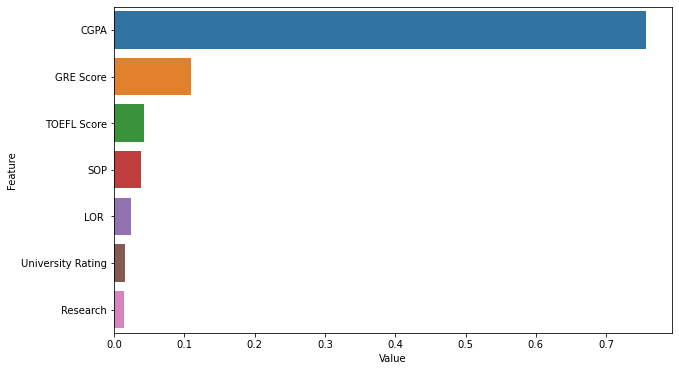

In [11]:
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns = ['Value','Feature']) 
plt.figure(figsize = (10, 6)) 
sns.barplot(x = "Value", y="Feature", data = feature_importance.sort_values(by = "Value", ascending = False)) 